In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
#show the features and first data entries of the data frame
df.head(7)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No


In [ ]:
#Get a summary on the data frame incl. data types,shape and memory storage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#Unique value per column

for i in df.columns:
  print(f"Unique {i}'s count :{df[i].nunique()}")
  print(f"{df[i].unique()}\n")

Unique customerID's count :7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique gender's count :2
['Female' 'Male']

Unique SeniorCitizen's count :2
[0 1]

Unique Partner's count :2
['Yes' 'No']

Unique Dependents's count :2
['No' 'Yes']

Unique tenure's count :73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Unique PhoneService's count :2
['No' 'Yes']

Unique MultipleLines's count :3
['No phone service' 'No' 'Yes']

Unique InternetService's count :3
['DSL' 'Fiber optic' 'No']

Unique OnlineSecurity's count :3
['No' 'Yes' 'No internet service']

Unique OnlineBackup's count :3
['Yes' 'No' 'No internet service']

Unique DeviceProtection's count :3
['No' 'Yes' 'No internet service']

Unique TechSupport's count :3
['No' 'Yes' 'No internet service']

Unique StreamingTV's

In [ ]:
#Get statistical information on numerical features
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#Get Customer Churn Count
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


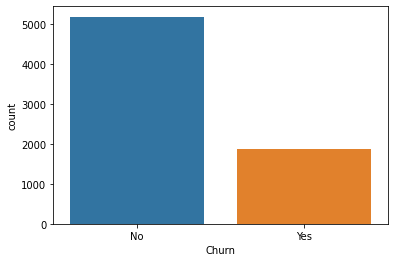

In [ ]:
#Visualize the count of customer churn
sns.countplot(df['Churn'])

In [ ]:
# Number of customers that are staying and leaving
num_retained=df[df.Churn=='No'].shape[0]
num_churned=df[df.Churn=='Yes'].shape[0]

#percentage of customers that stayed
print(num_retained/(num_retained+num_churned)*100,'% of customers that stayed with the company')

#percentage of customers that left
print(num_churned/(num_retained+num_churned)*100,'% of customers that left')


73.4630129206304 % of customers that stayed with the company
26.536987079369588 % of customers that left


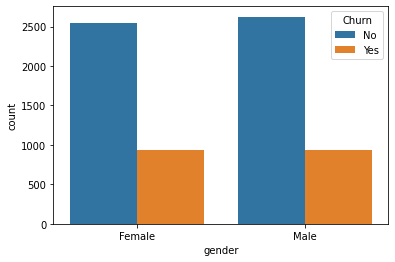

In [ ]:
#Gender wise Churn count Visualization
sns.countplot(x='gender',hue='Churn',data=df)

Text(0.5, 1.0, 'Number of Customers having multiple phone service')

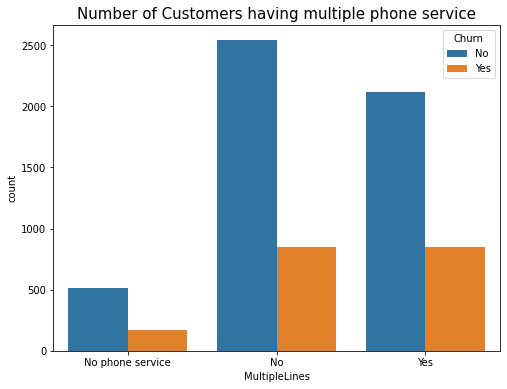

In [ ]:
#Whether having MultipleLines
plt.figure(figsize=(8, 6))
sns.countplot(x='MultipleLines',hue = 'Churn', data=df)
plt.title("Number of Customers having multiple phone service", size =15)

In [ ]:
#Create a fuction to generate countplots

plots={1:[111],2:[121,122],3:[131,132,133],4:[221,222,223,224],5:[231,232,233,234,235],6:[231,232,233,234,235,236]}

def countplot(x,y,df):
  rows=int(str(plots[len(y)][0])[0])
  columns=int(str(plots[len(y)][0])[1])
  plt.figure(figsize=(7*columns,7*rows))

  for i,j in enumerate(y):
    plt.subplot(plots[len(y)][i])
    ax=sns.countplot(x=j,hue=x,data=df)
    ax.set_title(j)
  
  return plt.show()


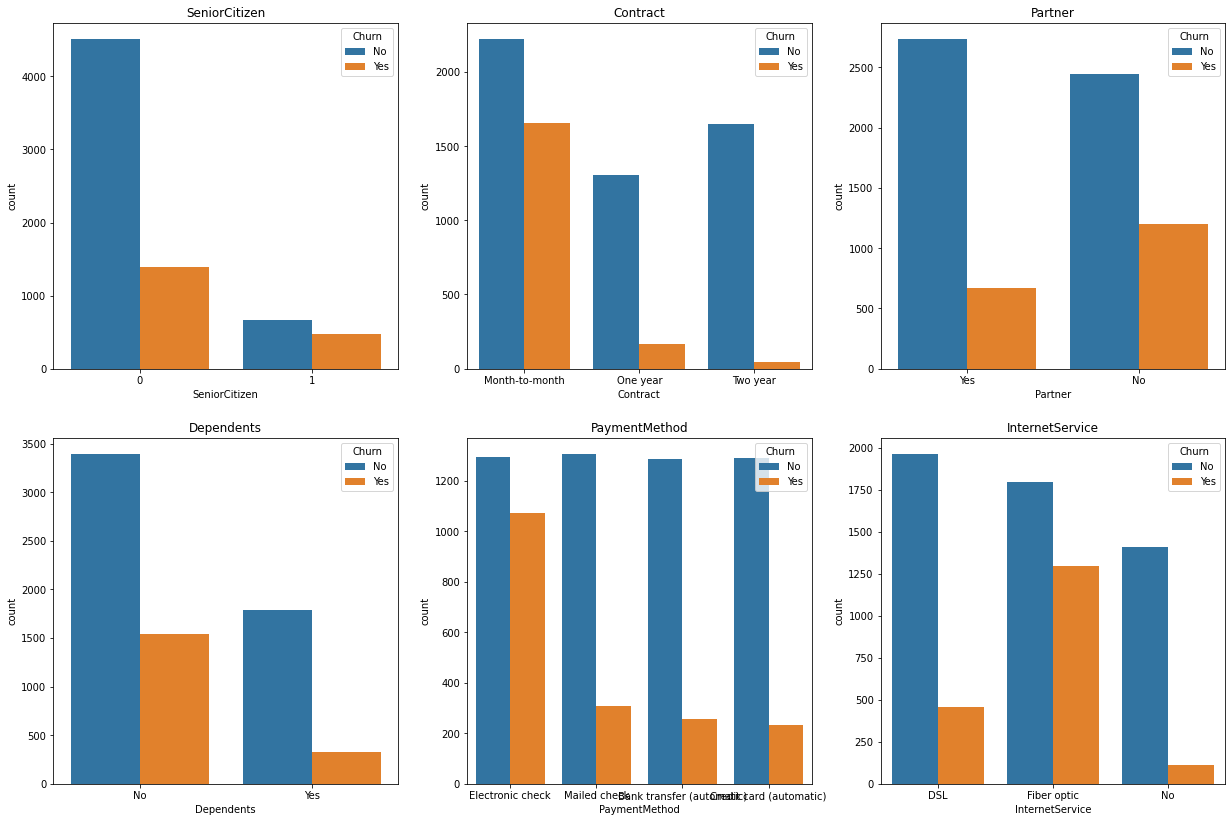

In [ ]:
#Generate countplots for various features

countplot("Churn",['SeniorCitizen','Contract','Partner','Dependents','PaymentMethod','InternetService'],df)

In [ ]:
#Changing the data type of "Total Charges" and "tenure" to float

df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

def feature_to_float(feature_list,df):
  for i in feature_list:
    df[i]=df[i].astype(float)
  return df

feature_to_float(['tenure'],df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
#Checking updated data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
#Create a function to generate box plot
def boxplot(x,y,df):
  rows=int(str(plots[len(y)][0])[0])
  columns=int(str(plots[len(y)][0])[1])
  plt.figure(figsize=(7*columns,7*rows))

  for i,j in enumerate(y):
    plt.subplot(plots[len(y)][i])
    ax=sns.boxplot(x=x,y=j,data=df[[x,j]])
    ax.set_title(j)
  
  return plt.show()


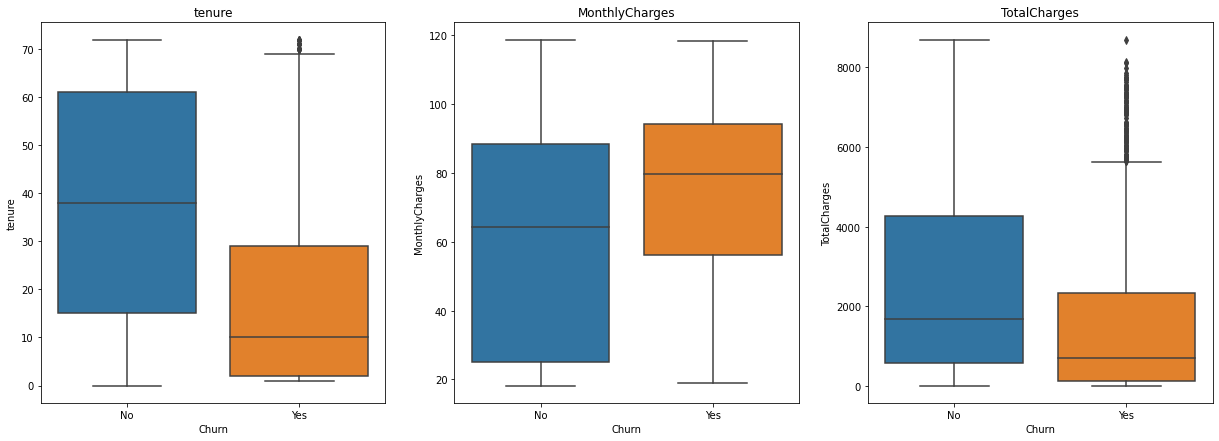

In [ ]:
#Generate boxplots for tenure,MonthlyCharges and TotalCharges
boxplot("Churn",["tenure","MonthlyCharges","TotalCharges"],df)

In [ ]:
 #Check for missing values
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**Feature Engineering**

In [ ]:
#Drop the rows with missing values
df=df.dropna()

In [ ]:
#Generate new feature "Number_Additional Services" by summing up number of add-on services consumed

df['Number_AdditionalServices']=(df[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]=='Yes').sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


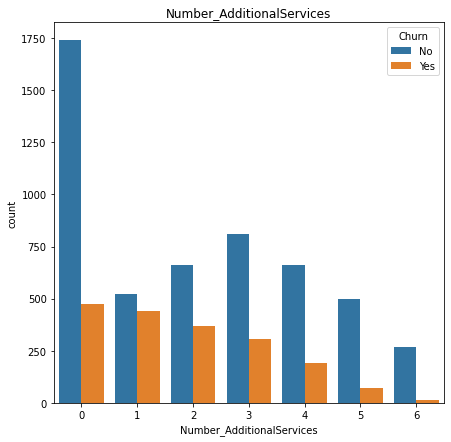

In [ ]:
#Generate countplot for the new feature

countplot('Churn',['Number_AdditionalServices'],df)

In [ ]:
#Label Encoding for identified columns

features_le=['gender','Partner','Dependents','PhoneService','PaperlessBilling']

def  label_encoding(features,df):
  for i in features:
    df[i]=df[i].map({'Yes':1,'No':0})
  return

label_encoding(['Partner','Dependents','Churn','PhoneService','PaperlessBilling'],df)
df['gender']=df['gender'].map({'Female':1,'Male':0})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
#One-Hot-Encoding for identified columns

features_ohe=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','Number_AdditionalServices']

df=pd.get_dummies(df,columns=features_ohe)

In [ ]:
#Min-Max-Scaling for identified columns

from sklearn.preprocessing import MinMaxScaler

features_mns=['tenure','MonthlyCharges','TotalCharges']
df_features_mns=pd.DataFrame(df,columns=features_mns)
df_remaining_features=df.drop(columns=features_mns)

mns=MinMaxScaler()
rescaled_features=mns.fit_transform(df_features_mns)

df_rescaled_features=pd.DataFrame(rescaled_features,columns=features_mns,index=df_remaining_features.index)

df=pd.concat([df_remaining_features,df_rescaled_features],axis=1)


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,...,Number_AdditionalServices_0,Number_AdditionalServices_1,Number_AdditionalServices_2,Number_AdditionalServices_3,Number_AdditionalServices_4,Number_AdditionalServices_5,Number_AdditionalServices_6,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,1,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0.000000,0.115423,0.001275
1,5575-GNVDE,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0.464789,0.385075,0.215867
2,3668-QPYBK,0,0,0,0,1,1,1,1,0,...,0,0,1,0,0,0,0,0.014085,0.354229,0.010310
3,7795-CFOCW,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0.619718,0.239303,0.210241
4,9237-HQITU,1,0,0,0,1,1,1,1,0,...,1,0,0,0,0,0,0,0.014085,0.521891,0.015330


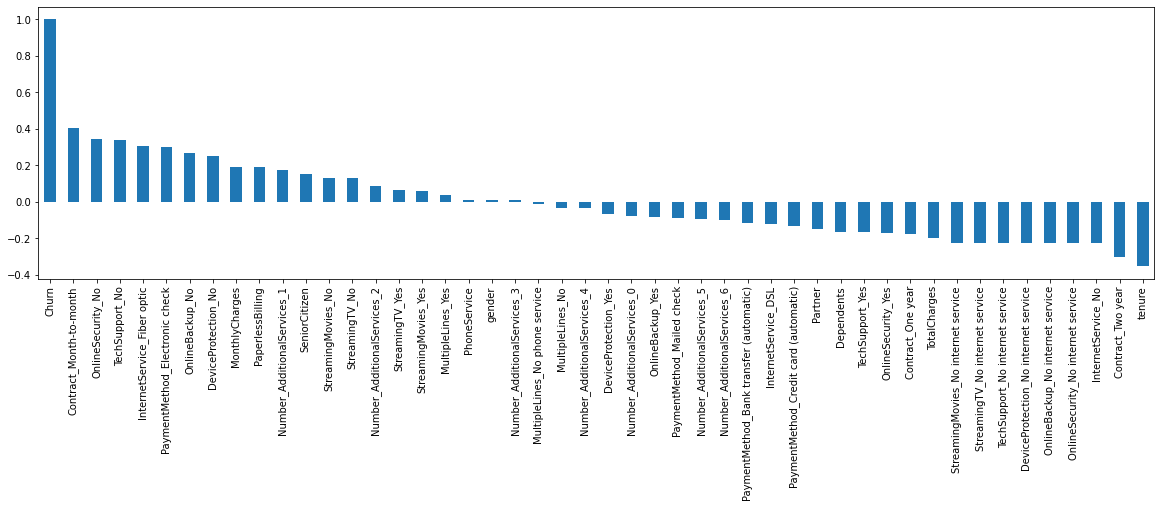

In [ ]:
#Show correlation plot for correlation of Churn with each of the remaining features

plt.figure(figsize=(16,10))
df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar',figsize=(20,5))

## **Making Prediction**

**Train-Test-Split**

In [ ]:
#Applying_Sklearn's splitter function train_test_split

from sklearn.model_selection import train_test_split

X1=df.drop('Churn',axis=1)
#X=X1.values
#y=df['Churn'].values

X = df.drop(['Churn','customerID'],axis=1)
y = df.Churn

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
X_train

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,Number_AdditionalServices_0,Number_AdditionalServices_1,Number_AdditionalServices_2,Number_AdditionalServices_3,Number_AdditionalServices_4,Number_AdditionalServices_5,Number_AdditionalServices_6,tenure,MonthlyCharges,TotalCharges
6030,1,0,0,0,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0.591549,0.306468,0.237411
3410,0,0,0,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0.028169,0.349751,0.019605
5483,1,0,1,0,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0.760563,0.592040,0.512272
5524,0,0,1,1,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0.619718,0.362189,0.292511
6337,1,0,1,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0.760563,0.822388,0.626564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,0,0,0,0,1,0,0,0,1,1,...,1,0,0,0,0,0,0,0.028169,0.319900,0.013668
5199,1,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0.704225,0.927861,0.655949
5235,0,0,0,0,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0.112676,0.625871,0.088351
5399,1,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0.690141,0.014925,0.111961


**Model Evaluation Metrics**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, roc_curve,roc_auc_score

from sklearn.metrics import precision_recall_curve, auc, f1_score,plot_confusion_matrix,precision_score, recall_score


In [ ]:
#Define a function that plots the feature weights for a classifier

def feature_weights(X_df,classifier,classifier_name):
  weights=pd.Series(classifier.coef_[0],index=X_df.columns.values).sort_values(ascending=False)

  top_weights_selected=weights[:10]
  plt.figure(figsize=(7,6))
  plt.tick_params(labelsize=10)
  plt.title(f'{classifier_name}-top 10 Features')
  top_weights_selected.plot(kind="bar")

  bottom_weights_selected=weights[-10:]
  plt.figure(figsize=(7,6))
  plt.tick_params(labelsize=10)
  plt.title(f'{classifier_name}-Bottom 10 Features')
  bottom_weights_selected.plot(kind="bar")

  return print("")





In [ ]:
#Define a function that plots the confusion matrix for  a classifier and the train and test accuracy

def confusion_matrix_plot(X_train,y_train,X_test,y_test,classifier,y_pred,classifier_name):
  fig,ax=plt.subplots(figsize=(7,6))
  plot_confusion_matrix(classifier,X_test,y_test,display_labels=["No Churn","Churn"],cmap=plt.cm.Blues,normalize=None,ax=ax)
  ax.set_title(f'{classifier_name}-Confusion Matrix')
  plt.show()

  fig,ax=plt.subplots(figsize=(7,6))
  plot_confusion_matrix(classifier,X_test,y_test,display_labels=["No Churn","Churn"],cmap=plt.cm.Blues,normalize='true',ax=ax)
  ax.set_title(f'{classifier_name}-Confusion Matrix(norm.)')
  plt.show()


  print(f'Accuracy Score Test:{accuracy_score(y_test,y_pred)}')
  print(f'Accuracy Score Train:{classifier.score(X_train,y_train)} (as comparison)')
  return print("")
      

In [ ]:
#Define a function that plots the ROC curve and the AUC score

def roc_curve_auc_score(X_test,y_test,y_pred_probabilities,classifier_name):
  y_pred_prob=y_pred_probabilities[:,1]
  fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

  plt.plot([0,1],[0,1],'k--')
  plt.plot(fpr,tpr,label=f'{classifier_name}')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'{classifier_name}-ROC Curve')
  plt.show()

  return print(f'AUC Score(ROC):{roc_auc_score(y_test,y_pred_prob)}\n')




In [ ]:
#Define a function that plot the precision_recall_curve and the F1 score and AUC score

def plot_precision_recall_curve_and_scores(X_test,y_test,y_pred,y_pred_probabilities,classifier_name):
  y_pred_prob=y_pred_probabilities[:,1]
  precision,recall,thresholds=precision_recall_curve(y_test,y_pred_prob)

  plt.plot(recall,precision,label=f'{classifier_name}')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title(f'{classifier_name}-Precision-Recall Curve')
  plt.show()

  f1_score_result,auc_score_result=f1_score(y_test,y_pred),auc(recall,precision)

  return print(f'F1 Score:{f1_score_result}\nAUC Score(PR):{auc_score_result}\n')




**LogisticRegression Model**

In [ ]:
from numpy.ma.core import log
from sklearn.linear_model import LogisticRegression

#Instanciate and train the logistic regression model based on the training set

logreg=LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

#Make predictions (classes and probabilities) with the trained model on the test set

y_pred_logreg=logreg.predict(X_test)
y_pred_logreg_prob=logreg.predict_proba(X_test)

In [ ]:
#print classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.72      1407
weighted avg       0.78      0.79      0.78      1407



**Plot Model Evaluations for Logistic Regression Model**

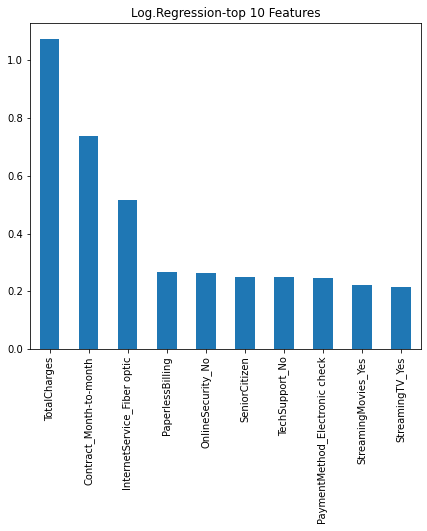

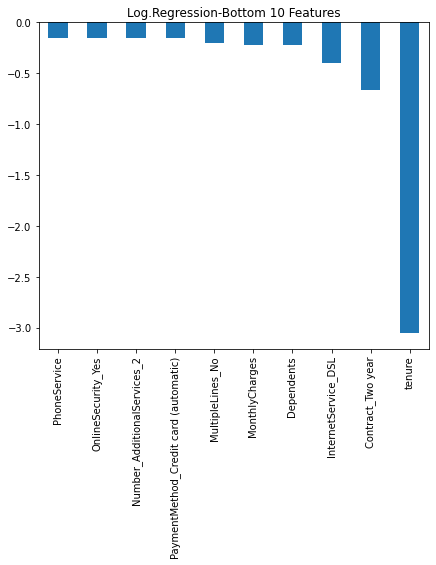

In [ ]:
#Feature weights

feature_weights(X,logreg,'Log.Regression')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


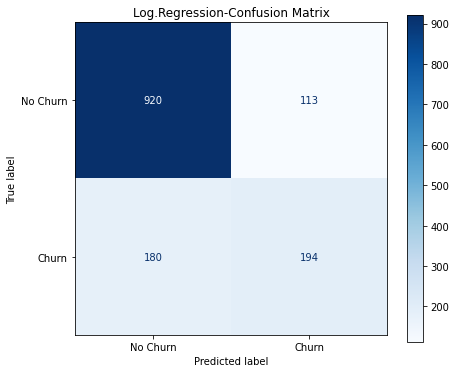

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


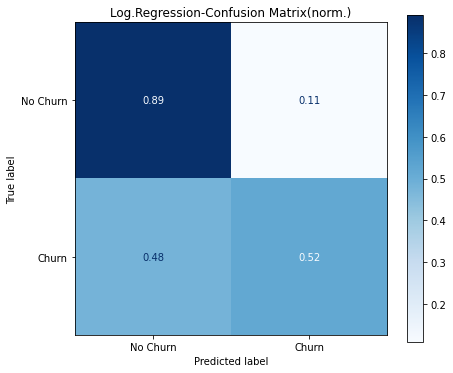

Accuracy Score Test:0.7917555081734187
Accuracy Score Train:0.8074666666666667 (as comparison)



In [ ]:
#Confusion Matrix

confusion_matrix_plot(X_train,y_train,X_test,y_test,logreg,y_pred_logreg,'Log.Regression')


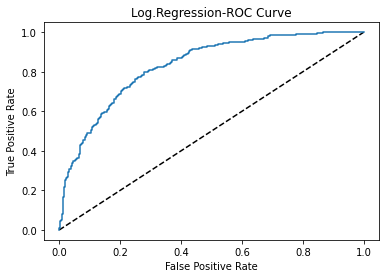

AUC Score(ROC):0.8318458774867863



In [ ]:
#ROC curve AUC

roc_curve_auc_score(X_test,y_test,y_pred_logreg_prob,'Log.Regression')

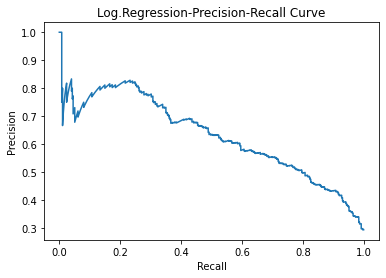

F1 Score:0.5697503671071952
AUC Score(PR):0.6302825609213848



In [ ]:
#Precision-Recall-Curve

plot_precision_recall_curve_and_scores(X_test,y_test,y_pred_logreg,y_pred_logreg_prob,'Log.Regression')

**K Nearest Neighbors**

In [ ]:
from sklearn.neighbors  import KNeighborsClassifier

#Instaciate and train the KNN classifier based on the training set

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

#Make predictions (classes and probabilities) with trained classifier on the test set

y_pred_knn=knn.predict(X_test)
y_pred_knn_prob=knn.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


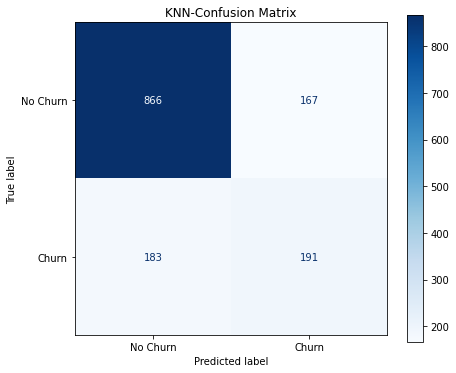

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


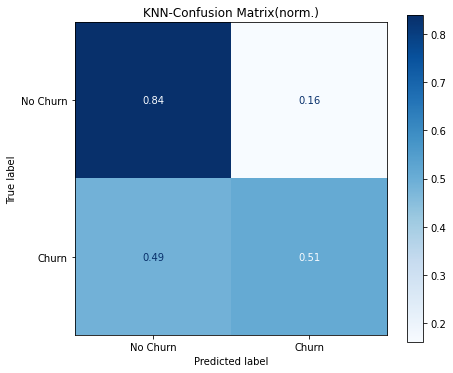

Accuracy Score Test:0.7512437810945274
Accuracy Score Train:0.8408888888888889 (as comparison)



In [ ]:
#Confusion Matrix

confusion_matrix_plot(X_train,y_train,X_test,y_test,knn,y_pred_knn,'KNN')

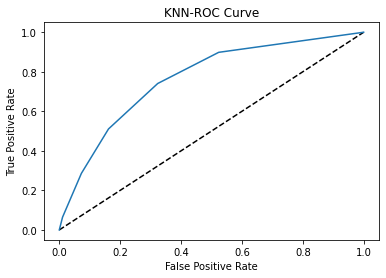

AUC Score(ROC):0.7641299677487823



In [ ]:
#ROC curve AUC

roc_curve_auc_score(X_test,y_test,y_pred_knn_prob,'KNN')

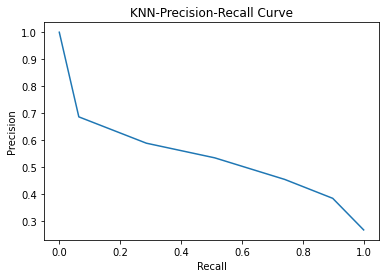

F1 Score:0.5218579234972678
AUC Score(PR):0.5337587548717432



In [ ]:
#Precision-Recall-Curve

plot_precision_recall_curve_and_scores(X_test,y_test,y_pred_knn,y_pred_knn_prob,'KNN')

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Instaciate and train the random forest model based on the training set

rf=RandomForestClassifier()
rf.fit(X_train,y_train)

#Make predictions (classes and probabilities) with trained classifier on the test set

y_pred_rf=rf.predict(X_test)
y_pred_rf_prob=rf.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


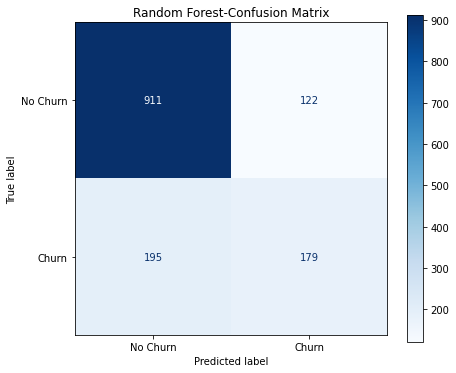

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


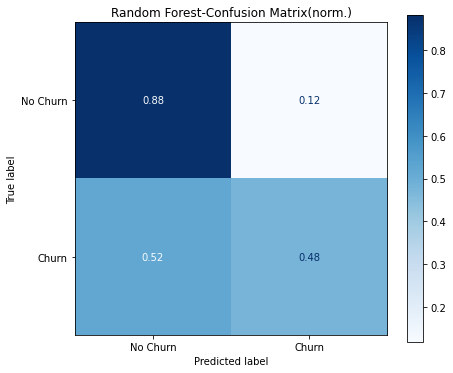

Accuracy Score Test:0.7746979388770433
Accuracy Score Train:0.9976888888888888 (as comparison)



In [ ]:
#Confusion Matrix

confusion_matrix_plot(X_train,y_train,X_test,y_test,rf,y_pred_rf,'Random Forest')

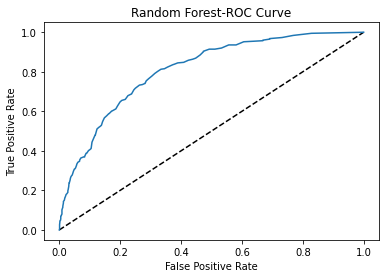

AUC Score(ROC):0.8088041165599391



In [ ]:
#ROC curve AUC

roc_curve_auc_score(X_test,y_test,y_pred_rf_prob,'Random Forest')

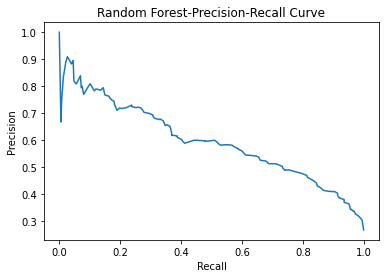

F1 Score:0.5303703703703704
AUC Score(PR):0.5953502119696168



In [ ]:
#Precision-Recall-Curve

plot_precision_recall_curve_and_scores(X_test,y_test,y_pred_rf,y_pred_rf_prob,'Random Forest')

**Support Vector Machin**e

In [ ]:
from sklearn.svm import SVC

#Instaciate and train the SVM model based on the training set

support_vector_m=SVC(kernel='rbf',probability=True)
support_vector_m.fit(X_train,y_train)

#Make predictions (classes and probabilities) with trained classifier on the test set

y_pred_svm=support_vector_m.predict(X_test)
y_pred_svm_prob=support_vector_m.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


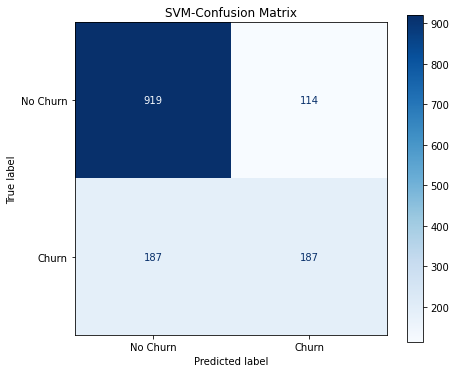

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


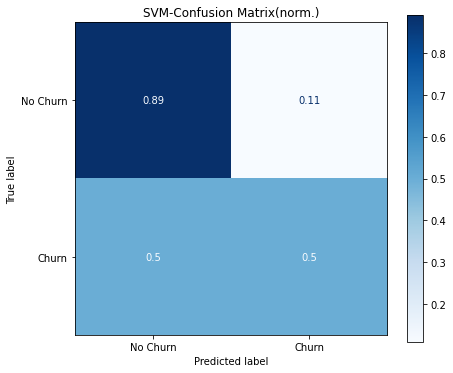

Accuracy Score Test:0.7860696517412935
Accuracy Score Train:0.8190222222222222 (as comparison)



In [ ]:
#Confusion Matrix

confusion_matrix_plot(X_train,y_train,X_test,y_test,support_vector_m,y_pred_svm,'SVM')

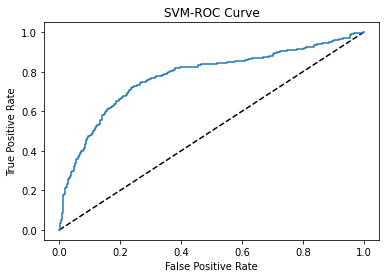

AUC Score(ROC):0.776335474786588



In [ ]:
#ROC curve AUC

roc_curve_auc_score(X_test,y_test,y_pred_svm_prob,'SVM')

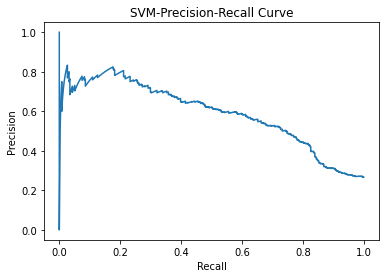

F1 Score:0.554074074074074
AUC Score(PR):0.5888837702990817



In [ ]:
#Precision-Recall-Curve

plot_precision_recall_curve_and_scores(X_test,y_test,y_pred_svm,y_pred_svm_prob,'SVM')

**Compare Accuracy of Each Model**

In [ ]:
prediction1=pd.DataFrame(y_pred_logreg)
prediction2=pd.DataFrame(y_pred_knn)
prediction3=pd.DataFrame(y_pred_rf)
prediction4=pd.DataFrame(y_pred_svm)

In [ ]:
#Accuracy
from sklearn import metrics
percent1 = metrics.accuracy_score(y_test, prediction1)
percent2 = metrics.accuracy_score(y_test, prediction2)
percent3 = metrics.accuracy_score(y_test, prediction3)
percent4 = metrics.accuracy_score(y_test, prediction4)


In [ ]:
models = pd.DataFrame({'name_model':["LogReg","KNN","Random Forest","SVM"],\
                        'accuracy_percentage':[percent1,percent2,percent3,percent4]})

models

,name_model,accuracy_percentage
0,LogReg,0.791756
1,KNN,0.751244
2,Random Forest,0.774698
3,SVM,0.786070


**Predict the Probability of Churn of each Customer using Selected Model**

In [ ]:
#Predict the probability of Chrn of each customer
df['Probability_of_Churn'] = logreg.predict_proba(df[X_train.columns])[:,1]

In [ ]:
#Create a Dataframe showcasing probability of Churn of each customer
df[['customerID','Probability_of_Churn']].head(7043)

,customerID,Probability_of_Churn
0,7590-VHVEG,0.614590
1,5575-GNVDE,0.036702
2,3668-QPYBK,0.248152
3,7795-CFOCW,0.027445
4,9237-HQITU,0.693679
...,...,...
7038,6840-RESVB,0.111618
7039,2234-XADUH,0.133596
7040,4801-JZAZL,0.380339
7041,8361-LTMKD,0.724099


In [ ]:
df=pd.read_csv('/content/tel_churn.csv')
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
X = df.drop(['Churn','Unnamed: 0','MonthlyCharges','TotalCharges'],axis=1)
y = df.Churn

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
6021,0,1,0,1,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
3404,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,1,0,0,0,0,0
5474,0,1,0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
5515,0,0,1,0,1,0,1,0,1,1,...,1,0,0,0,0,0,0,1,0,0
6328,0,1,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,0,1,1,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
5191,0,1,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
5226,0,0,1,1,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
5390,0,1,0,1,0,1,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
logreg.fit(X_train,y_train)


LogisticRegression(max_iter=1000)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
support_vector_m.fit(X_train,y_train)

SVC(probability=True)

**Check Whether a new customer will churn or not**

In [ ]:
data = [[0,29.85,29.85,"Female","Yes","No","No","No phone service","DSL","No","Yes","No","No","No","No","Month-to-month","Yes","Electronic check",1]]

new_df = pd.DataFrame(data, columns = ['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'gender', 
                                           'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                                           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                           'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                                           'PaymentMethod', 'tenure'])

In [ ]:
new_df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure
0,0,29.85,29.85,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,1


In [ ]:
df_1=pd.read_csv('/content/first_telc.csv')

df_1

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
3,6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
4,11,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,250,Female,0,Yes,No,51,Yes,No,Fiber optic,Yes,Yes,Yes,No,Yes,No,One year,Yes,Electronic check,93.50,4619.55
71,435,Female,0,No,No,26,No,No phone service,DSL,No,No,Yes,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),44.45,1183.8
72,488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
73,546,Male,0,Yes,Yes,39,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Mailed check,86.30,3266


In [ ]:
df_2 = pd.concat([df_1, new_df], ignore_index = True) 

df_2

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,1.0,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,3.0,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
3,6.0,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
4,11.0,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,435.0,Female,0,No,No,26,No,No phone service,DSL,No,No,Yes,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),44.45,1183.8
72,488.0,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
73,546.0,Male,0,Yes,Yes,39,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Mailed check,86.30,3266
74,20.0,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65


In [ ]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
df_2['tenure_group'] = pd.cut(df_2.tenure.astype(int), range(1, 80, 12), right=False, labels=labels)
#drop column customerID and tenure
df_2.drop(columns= ['tenure'], axis=1, inplace=True) 

new_df__dummies = pd.get_dummies(df_2[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
           'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
           'Contract', 'PaperlessBilling', 'PaymentMethod','tenure_group']])

new_df__dummies

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,1,0,0,1,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,1,1,0,1,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0
2,0,0,1,1,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0,1,1,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,1,0,1,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
72,0,1,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
73,0,0,1,0,1,0,1,0,1,1,...,0,0,0,1,0,0,0,1,0,0
74,1,0,1,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
single =logreg.predict(new_df__dummies.tail(1))
probablity = logreg.predict_proba(new_df__dummies.tail(1))[:,1]

if single==1:
  o1 = "This customer is likely to be churned!!"
  print(o1)
  o2 = "Confidence: {}".format(probablity*100)
  print(o2)
else:
  o1 = "This customer is likely to continue!!"
  print(o1)
  o2 = "Confidence: {}".format(probablity*100)
  print(o2)


This customer is likely to be churned!!
Confidence: [56.70783465]


In [ ]:
single =knn.predict(new_df__dummies.tail(1))
probablity = knn.predict_proba(new_df__dummies.tail(1))[:,1]

if single==1:
  o1 = "This customer is likely to be churned!!"
  print(o1)
  o2 = "Confidence: {}".format(probablity*100)
  print(o2)
else:
  o1 = "This customer is likely to continue!!"
  print(o1)
  o2 = "Confidence: {}".format(probablity*100)
  print(o2)


This customer is likely to continue!!
Confidence: [40.]


In [ ]:
single =rf.predict(new_df__dummies.tail(1))
probablity = rf.predict_proba(new_df__dummies.tail(1))[:,1]

if single==1:
  o1 = "This customer is likely to be churned!!"
  print(o1)
  o2 = "Confidence: {}".format(probablity*100)
  print(o2)
else:
  o1 = "This customer is likely to continue!!"
  print(o1)
  o2 = "Confidence: {}".format(probablity*100)
  print(o2)


This customer is likely to continue!!
Confidence: [10.75]


In [ ]:
single =support_vector_m.predict(new_df__dummies.tail(1))
probablity = support_vector_m.predict_proba(new_df__dummies.tail(1))[:,1]

if single==1:
  o1 = "This customer is likely to be churned!!"
  print(o1)
  o2 = "Confidence: {}".format(probablity*100)
  print(o2)
else:
  o1 = "This customer is likely to continue!!"
  print(o1)
  o2 = "Confidence: {}".format(probablity*100)
  print(o2)

This customer is likely to continue!!
Confidence: [42.52715076]
